# Décroissance radioactive

<div class = 'alert alert-info'>
Pour exécuter le code écrit dans un bloc : <b>MAJ-ENTREE </b><br>
    Pour recommencer depuis le début : Menu <b>Kernel / Restart and clear output </b><br>
    Toujours exécuter dans l'ordre le code  écrit dans les blocs précédés de la mention <b>Entrée  [  ]</b>
</div>

<div class = 'alert alert-warning'>Importation des modules de calcul et de tracé de courbe.
    </div>

In [10]:
import math 
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import linregress

<div class = 'alert alert-warning'><h3>Mesures de l'activité d'une population de noyaux radioactifs.</h3><br>
    On dispose de mesures de l'activité radioactive effectuées sur une population de noyaux de radon 220.<br>
    Les mesures ont été rassemblées dans les deux listes <code class = "python">A_mesure</code> et <code class = "python">t_mesure</code> correspondant aux activités mesurées et aux dates respectives.
</div>

In [11]:
t_mesure = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63,
            70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168]
t_max = max(t_mesure)
A_mesure = [230, 189, 196, 160, 150, 150, 131, 124, 100,
            105, 91, 80, 81, 72, 70, 55, 50, 51, 45, 46, 44, 31, 34, 26, 31]

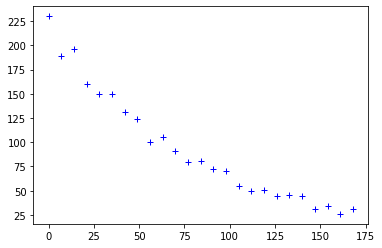

In [18]:
plt.plot(t_mesure, A_mesure, "+",color="blue")

<div class = 'alert alert-warning'><h3>Constante radioactive.</h3><br>
    L'activité A(t) est le nombre de désintégration par unité de temps dans une population de noyaux radioactifs.<br>
    Elle correspond donc 
    $$
    A(t) = - \frac {dN(t)} {dt}
    $$
    <br>
    La constante radioactive λ d'un noyau relie le nombre de noyaux présents et l'activité.
    $$
    A(t) = \lambda \times N(t)
    $$
    l'activité s'exprime en Becquerel (Bq) et la constante radioactive en s<sup>-1</sup>.
    <hr>
    Montrer que
    $$
    \frac{ dA(t)}{dt} = - \lambda \times A(t) 
    $$
   
</div>

<div class = 'alert alert-warning'>Valeur de la constante radioactive du radon 220
    </div>

In [46]:
lambda_Rn = 0.0125     # en s-1

## Modélisation par la méthode d'Euler.

<div class = 'alert alert-warning'>
  <H3>Méthode d'Euler</H3><br>  
   La méthode d'Euler donne une approximation de la valeur de A à la date t+Δt en considérant que A(t) va s'accroître de 
    $$
    \frac{ dA(t)}{dt}  \times \Delta t 
    $$
    <br>c'est-à-dire
    $$
    A(t + \Delta t) = A(t) + \frac{ dA(t)}{dt}  \times \Delta t 
    $$
    <br>  <br> 
    A partir du résultat de la question précédente, on peut 
    écrire la valeur de l'activité A à la date t+Δt en fonction de A(t) et de son taux d'accroissement.
    $$
    A(t + \Delta t ) = A(t) - \lambda \times A(t)  \times \Delta t
    $$
    </div>

<div class = 'alert alert-warning'>
    Le code ci-dessous définit une fonction nommée <code class = "python">methode_d_euler</code> reçoit les arguments: <br>
    - <code class = "python">A_0</code> première valeur de A   <br>
    - <code class = "python">nbr_de_pas</code> qui correspond au nombre de points qui seront calculés   <br>
    - <code class = "python">pas</code> qui correspond au pas de calcul   <br>
A chaque itération des boucles <code class = "python">for ...</code>, la fonction calcule la valeur suivante de A(t) et de t et les placent dans les deux tableaux <code class = "python">A</code> et <code class = "python">t</code>

In [47]:
def methode_d_euler(A_0, nbr_de_pas, pas):
    A = np.zeros(nbr_de_pas)        # créations de 2 tableaux "numpy" ne contenant  
    t = np.zeros(nbr_de_pas)        # que des zéros (taille : nbr_de_pas)
    
    date = 0                        # initialisation des valeurs
    activite = A_0
    
    for i in range(nbr_de_pas):    
        A[i] = activite
        activite = A[i]-lambda_Rn*A[i]*pas

    for i in range(nbr_de_pas):    
        t[i] = date
        date = t[i] + pas
        
    return A, t

## Modélisation de l'activité d'une population de radon 220.

<div class = 'alert alert-warning'>Définition du nombre de points calculés et du pas de calcul (qui correspond à Δt)
    </div>

In [48]:
nombre_points = 20
Delta_t = t_max/nombre_points

<div class = 'alert alert-warning'>Appel de la fonction <code class = "python">methode_d_euler</code> et passage des arguments. <br>
    Les résultats sont attribués aux deux tableaux <code class = "python">A_calculee</code> et <code class = "python">date</code>.
    </div>

In [49]:
A_calculee, date = methode_d_euler(A_mesure[0] , nombre_points, Delta_t)


<div class = 'alert alert-warning'>Représentation graphique des valeurs mesurées et des valeurs calculées par la modélistaion
    </div>

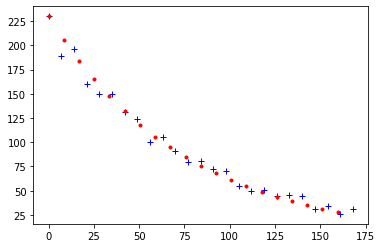

In [50]:

plt.plot(t_mesure, A_mesure, "+",color="blue")
plt.plot(date, A_calculee, ".", color="red")


<div class = 'alert alert-warning'>
    Questions
    <hr>
    <i>
       </i></div>

C'est fini

Il ne reste plus qu'à télécharger le fichier !


<div class = 'alert alert-success'><h4>La commande suivante imprime toutes les lignes de code exécutées depuis la dernière initialisation de la page (Restart and Clear Output) <br><br>Cela permet de les copier dans Spyder ou dans un fichier .text par exemple.</h4></div>

In [9]:
%history

import math 
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import linregress
t_mesure = [0, 7, 14, 21, 28, 35, 42, 49, 56, 63,
            70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168]
t_max = max(t_mesure)
A_mesure = [230, 189, 196, 160, 150, 150, 131, 124, 100,
            105, 91, 80, 81, 72, 70, 55, 50, 51, 45, 46, 44, 31, 34, 26, 31]
plt.plot(t_mesure, A_mesure, "+")
lambda_Rn = 0.0125      # en s-1
def methode_d_euler(A_0, nbr_de_pas, pas):
    A = np.zeros(nbr_de_pas)        # créations de 2 tableaux "numpy" ne contenant  
    t = np.zeros(nbr_de_pas)        # que des zéros (taille : nbr_de_pas)
    
    date = 0                        # initialisation des valeurs
    activite = A_0
    
    for i in range(nbr_de_pas):    
        A[i] = activite
        activite = A[i]-lambda_Rn*A[i]*pas

    for i in range(nbr_de_pas):    
        t[i] = date
        date = t[i] + pas
        
    return A, t
nombre_points = 150
Delta_t = t_max/nomb